In [12]:
import pandas as pd
import numpy as np
from pandas import json_normalize
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import json
import scipy.stats as stats
from scipy.stats import norm

In [13]:
df = pd.read_csv (r'users_file.csv',sep='\t')

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3075 entries, 0 to 3074
Data columns (total 39 columns):
 #   Column                        Non-Null Count  Dtype              
---  ------                        --------------  -----              
 0   avatar_url                    3075 non-null   object             
 1   city                          1391 non-null   object             
 2   comments_count                3075 non-null   int64              
 3   country_code                  1298 non-null   object             
 4   created_at                    3075 non-null   datetime64[ns, UTC]
 5   description                   1156 non-null   object             
 6   first_name                    1989 non-null   object             
 7   followers                     2352 non-null   object             
 8   followers_count               3075 non-null   int64              
 9   followings                    2164 non-null   object             
 10  followings_count              3075 n

In [ ]:
df['created_at'] = pd.to_datetime(df['created_at']) # convert string data to datetime object
# dict(df['created_at'].dt.year.value_counts())
dict(df['followings_count'].value_counts())

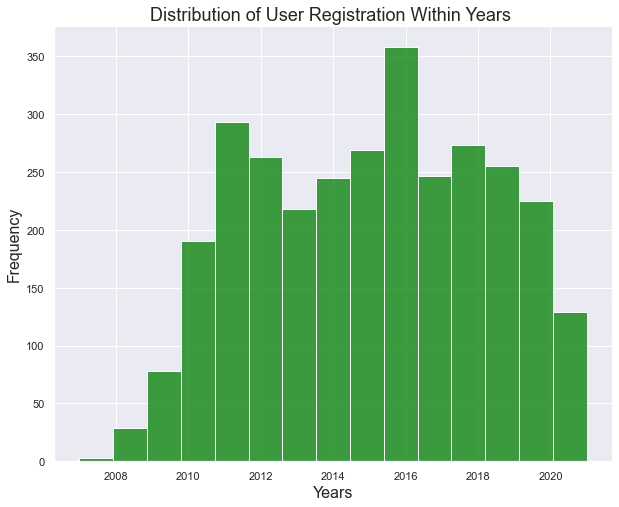

<Figure size 720x576 with 0 Axes>

In [58]:
sns.set(style="darkgrid")
sns.histplot(data=df['created_at'].dt.year, kde=False, color='green', bins=15)
sns.set(rc={'figure.figsize':(10,8)})
plt.title('Distribution of User Registration Within Years ', fontsize=18)
plt.xlabel('Years', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.show()
plt.clf()

### Nhận xét: 
- Năm cột mốc nào mà SoundCloud trở nên phổ biến với số lượt người đăng kí cao vượt trội trong khoảng thời gian phát triển từ năm 2007 đến hiện tại (năm 2021)? 
- **Phân tích**:
    + Sử dụng trường dữ liệu created_at: là một Series ghi nhận thời gian tạo tài khoản của các user, với kiểu định dạng datetime64 
    + Trường created_at không có mất mát dữ liệu
    + Kiểu dữ liệu: datetime64
    + Không có bất thường trong kiểu dữ liệu
- **Ý nghĩa biểu đồ**:
    + Chọn Histogram để trực quan hoá vì thuận tiện cho việc thống kê phân phối tần suất của các mốc thời gian
    + Phân phối hai đỉnh: năm 2011 và năm 2016 
    + Tần suất: cao nhất (năm 2016/ 358 lần), thấp nhất (năm 2007/ 3 lần)
    + Trước khi trực quan hoá, dự đoán câu trả lời là năm 2021 vì theo ước tính thời gian càng về sau mức độ phổ biến càng tăng cao. Nhưng khi có biểu đồ, kết quả dự đoán đã trở thành sai, vì tuỳ mỗi thời điểm sẽ có các yếu tố khác nhau tác động (bài hát yêu thích có mặt trên SoundCloud, cải tiến website thu hút sự chú ý của người dùng,...) đến lưu lượng người dùng đăng kí, chứ không phải suy luận dựa theo thời gian luỹ tiến.

______________________________________

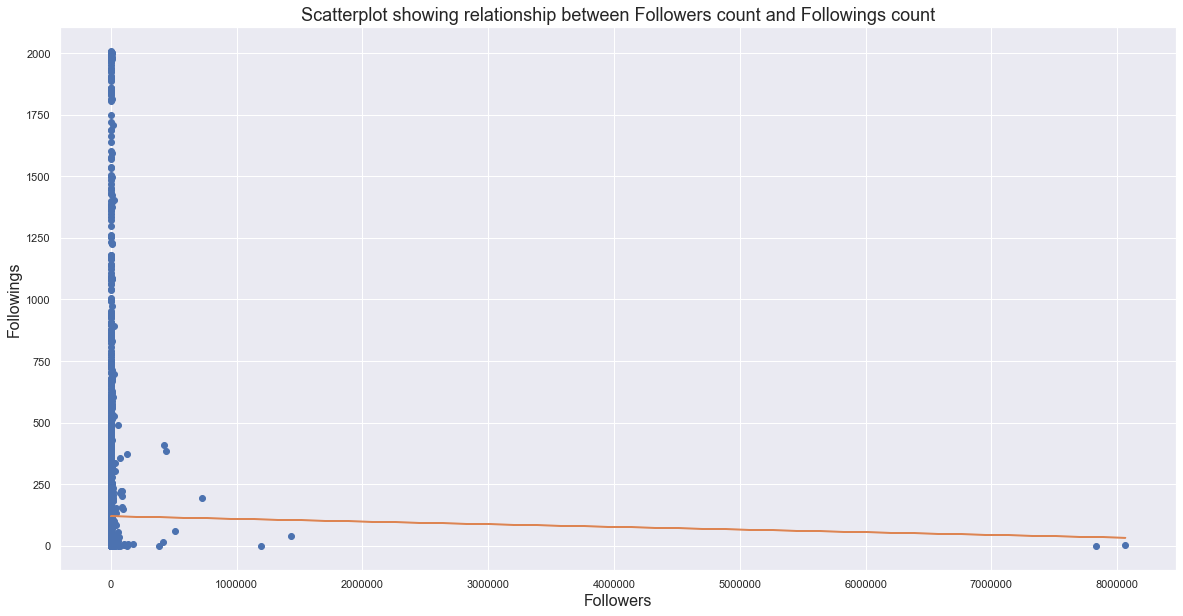

<Figure size 1440x720 with 0 Axes>

In [89]:
x = df['followers_count']
y = df['followings_count']
plt.plot(x, y, 'o')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('Followers', fontsize=16)
plt.ylabel('Followings', fontsize=16)
plt.title('Scatterplot showing relationship between Followers count and Followings count', fontsize=18)
plt.show()
plt.clf()

### Nhận xét: 
- Mối quan hệ giữa 2 trường followings_count và followers_count của một user là đồng biến, nghịch biến hay không có tương quan?
- **Phân tích**:
    + Sử dụng trường dữ liệu followers_count và followings_count: chứa tập hợp số chỉ số lượng người theo dõi user đó hoặc là user đang theo dõi từng đấy người.
    + Trường followers_count và followings_count đều không có mất mát dữ liệu
    + Kiểu dữ liệu: int64
    + Không có bất thường trong kiểu dữ liệu
- **Ý nghĩa biểu đồ**:
    + Chọn Scatterplot để trực quan hoá vì nó phù hợp với nhu cầu thể hiện rõ ràng mối quan hệ của hai trường followers_count và followings_count
    + Slope (độ dốc) hướng xuống: dốc âm, thể hiện mối tương quan đối nghịch
    + Trước khi trực quan hoá, dự đoán câu trả lời là mối quan hệ giữa hai trường followers_count và followings_count là đối nghịch. Sau khi trực quan hoá, cho thấy rằng dự đoán là đúng: user càng nhiều người theo dõi (follower) sẽ theo dõi rất ít số lượng user khác (following)

_______________________________________

In [7]:
df = pd.read_csv (r'playlists_file.csv',sep='\t')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7013 entries, 0 to 7012
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artwork_url       2691 non-null   object 
 1   created_at        7013 non-null   object 
 2   description       1610 non-null   object 
 3   display_date      7013 non-null   object 
 4   duration          7013 non-null   int64  
 5   embeddable_by     7013 non-null   object 
 6   genre             2768 non-null   object 
 7   id                7013 non-null   int64  
 8   is_album          7013 non-null   bool   
 9   kind              7013 non-null   object 
 10  label_name        482 non-null    object 
 11  last_modified     7013 non-null   object 
 12  license           7013 non-null   object 
 13  likers            3610 non-null   object 
 14  likes_count       7013 non-null   int64  
 15  managed_by_feeds  7013 non-null   bool   
 16  permalink         7013 non-null   object 


In [9]:
df_corr = df[['likes_count','reposts_count','track_count']]

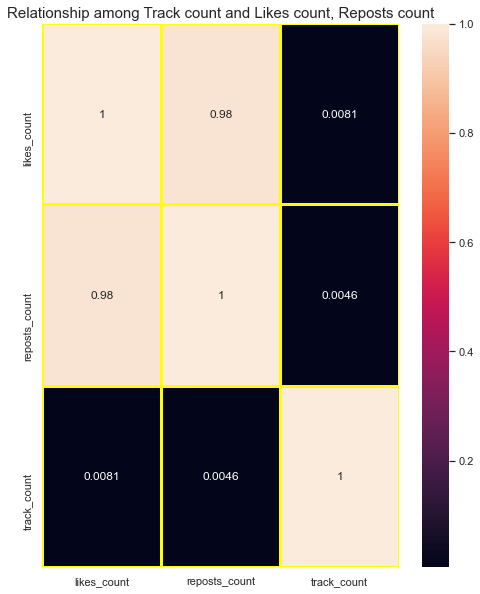

In [91]:
sns.heatmap(df_corr.corr(),annot=True,linewidths=2,
                linecolor='yellow')
sns.set(rc={'figure.figsize':(8,10)})
plt.title("Relationship among Track count and Likes count, Reposts count",size = 15)
plt.show()

### Nhận xét: 
- Có thể làm tăng số lượt like và repost của một playlist bằng cách tăng số lượng track trong playlist đó được hay không?
- **Phân tích**:
    + Sử dụng 3 trường dữ liệu likes_count (lưu trữ số lượt yêu thích của các user tương tác), reposts_count (lưu trữ số lượng reup các tác phẩm), track_count (lưu trữ số lượng bài hát trong một playlist)
    + Cả 3 trường đều không có mất mát dữ liệu
    + Kiểu dữ liệu: int64 => Không có bất thường trong kiểu dữ liệu
- **Ý nghĩa biểu đồ**:
    + Chọn Heatmap để trực quan hoá vì nó phù hợp với nhu cầu thể hiện tốt mối quan hệ của ba trường likes_count, reposts_count và track_count
    + Trước khi trực quan hoá, dự đoán câu trả lời là track_count sẽ có quan hệ đồng biến với likes_count và reposts_count. Có nghĩa khi số lượng bài hát tăng cao đồng nghĩa mức độ phổ biến sẽ cao hơn, sẽ có nhiều cơ hội tương tác với người dùng hơn
    + Sau khi trực quan hoá, ta thấy mối quan hệ giữa reposts_count và likes_count hợp lý hơn cả. Khi heatmap cho thấy rõ ràng sự mờ nhạt